In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [ ]:
x = pd.read_csv('x.csv', index_col=0)['0']
y = pd.read_csv('y.csv', index_col=0)['0']

array([ 1.46210794,  1.13376944, -2.3015387 ,  1.74481176,  0.04221375,
       -0.61175641,  0.3190391 , -0.7612069 ,  0.58281521, -1.09989127,
        0.86540763,  1.62434536, -0.52817175, -0.24937038, -1.07296862,
       -0.38405435, -0.17242821, -0.3224172 , -2.06014071, -0.87785842])

In [ ]:

class Model: # Модель парной линейной регрессии когда начальные коэффициенты равны 1
    def __init__(self):
        self.b0 = 1
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def gs(self, X, Y, alpha=0.001): # градиентный спуск
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            Jb0 = sum(self.predict(X) - Y) /len(X)
            Jb1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * Jb0
            self.b1 -= alpha * Jb1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

my_model = Model()
s,e = my_model.gs(x,y)
print('ошибка', my_model.error(x,y))

X0 = np.linspace(min(x)-1, max(x)+1, 100)
Y0 = my_model.predict(X0)
plt.scatter(x, y, color='g')
plt.plot(X0, Y0, color='r')
plt.show()

ошибка 2.5297934237939247e-06


pandas.core.series.Series

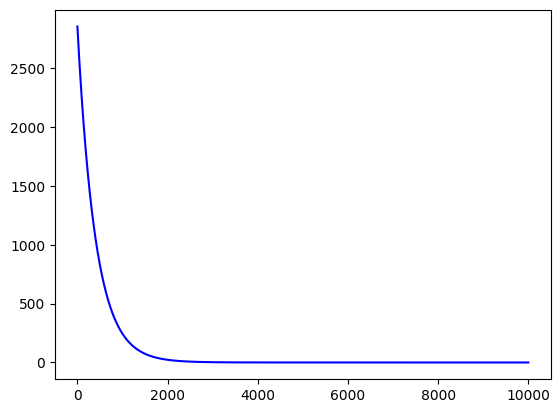

In [ ]:
plt.plot(s, e, 'b')
plt.show()

ошибка 1.656741680078997e-06


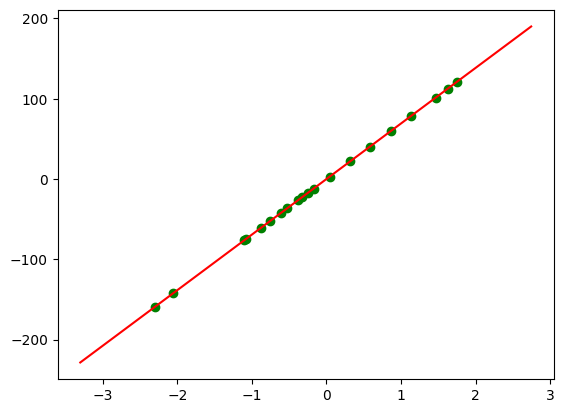

In [ ]:
class Model1(Model): # Модель парной линейной регрессии когда начальные коэффициенты равны 5
    def __init__(self):
        self.b0 = 5
        self.b1 = 5

my_model = Model1()
s,e = my_model.gs(x,y)
print('ошибка', my_model.error(x,y))

X0 = np.linspace(min(x)-1, max(x)+1, 100)
Y0 = my_model.predict(X0)
plt.scatter(x, y, color='g')
plt.plot(X0, Y0, color='r')
plt.show()

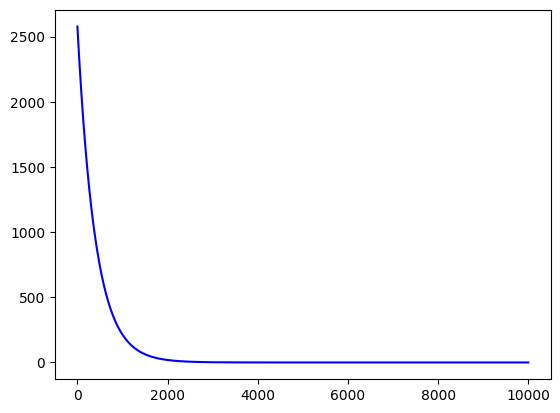

In [ ]:
plt.plot(s, e, 'b')
plt.show()

ошибка 1.577524649461241e-06


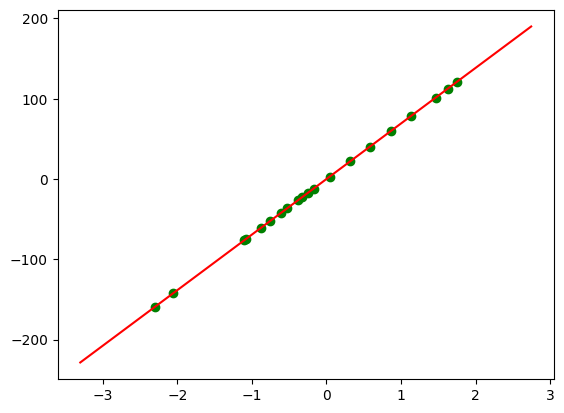

In [ ]:
class Model2(Model): # Модель парной линейной регрессии когда начальные коэффициенты разные
    def __init__(self):
        self.b0 = 7
        self.b1 = 2

my_model = Model2()
s,e = my_model.gs(x,y)
print('ошибка', my_model.error(x,y))

X0 = np.linspace(min(x)-1, max(x)+1, 100)
Y0 = my_model.predict(X0)
plt.scatter(x, y, color='g')
plt.plot(X0, Y0, color='r')
plt.show()

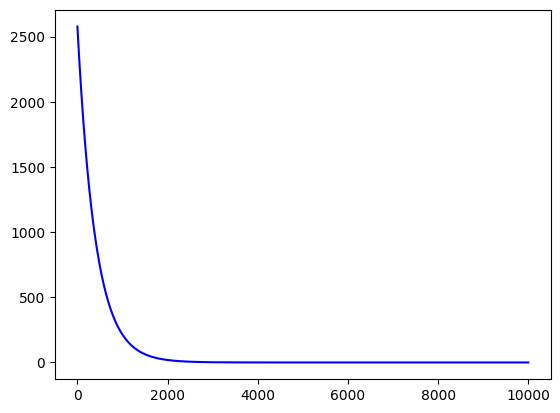

In [ ]:
plt.plot(s, e, 'b')
plt.show()

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

ошибка 1.658624426653096e-27


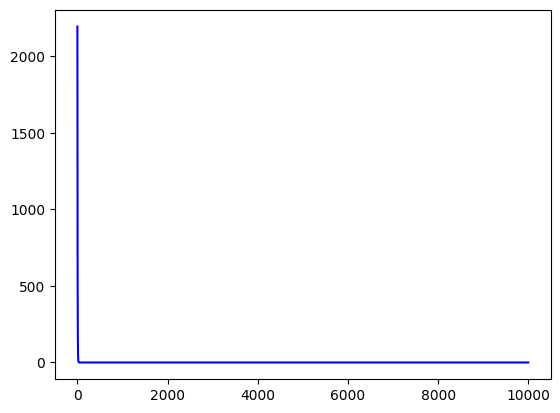

In [ ]:
class Model3(Model):
    def gs(self, X, Y, alpha): # градиентный спуск с разными альфа
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            Jb0 = sum(self.predict(X) - Y) /len(X)
            Jb1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * Jb0
            self.b1 -= alpha * Jb1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

m = Model3()
s,e = m.gs(x,y,0.1)
print('ошибка', m.error(x,y))

plt.plot(s, e, 'b')
plt.show()

ошибка 2.532243505759448e-29


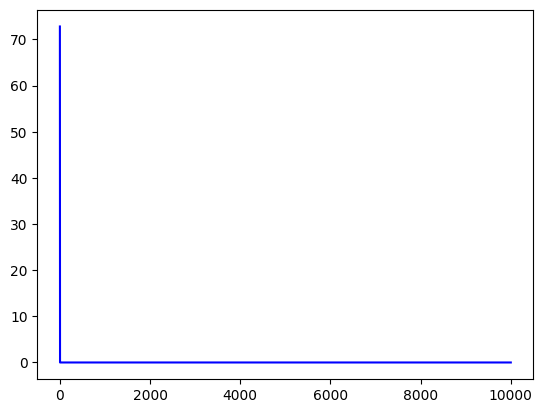

In [ ]:
m1 = Model3()
s,e = m1.gs(x,y,0.9)
print('ошибка', m1.error(x,y))

plt.plot(s, e, 'b')
plt.show()

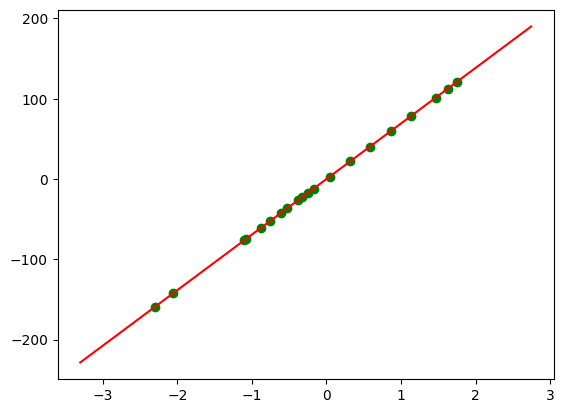

In [ ]:
X0 = np.linspace(min(x)-1, max(x)+1, 100)
Y0 = m1.predict(X0)
plt.scatter(x, y, color='g')
plt.plot(X0, Y0, color='r')
plt.show()

Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [ ]:
x = pd.read_csv('x.csv', index_col=0)
y = pd.read_csv('y.csv', index_col=0)
sum(x.values)

array([-2.66729273])

In [ ]:
class Model: # Модель парной линейной регрессии когда начальные коэффициенты равны 1
    def __init__(self):
        self.b0 = 1
        self.b1 = 1
    def predict(self, X):
        return self.b0 + self.b1 * X.values
    def error(self, X, Y):
        return sum(((self.predict(X.values) - Y.values)**2) / (2 * len(X.values)))
    def gs(self, X, Y, alpha=0.001): # градиентный спуск
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            Jb0 = sum(self.predict(X.values) - Y.values) /len(X.values)
            Jb1 = sum((self.predict(X.values) - Y.values) * X.values) /len(X.values)
            self.b0 -= alpha * Jb0
            self.b1 -= alpha * Jb1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

my_model = Model()
s,e = my_model.gs(x,y)
print('ошибка', my_model.error(x,y))

AttributeError: ignored

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
type(x.values)

numpy.ndarray